In [1]:
# All imports should be in first cell
import cartopy
import GMesh
import importlib
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# Create a target grid

This creates a regular spherical (geographic) grid covering Strait of Dover 1$^\circ$E--2$^\circ$E, 50.5$^\circ$N--51.5$^\circ$N.

<GMesh nj:9 ni:10 shape:(9,10)>
Target mesh longitude range: 1.0 2.0
Target mesh latitude range: 50.75 51.5


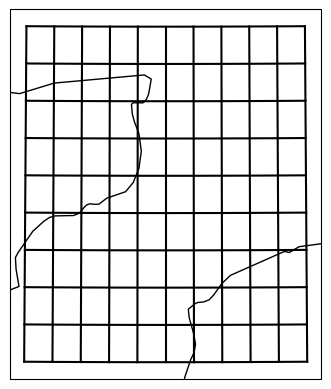

In [2]:
#Reload the GMesh tool (in case you change something in the tool and want it to take effect in this notebook)
importlib.reload(GMesh)
target_mesh = GMesh.GMesh( lon=np.linspace(1, 2, 11), lat=np.linspace(50.75, 51.5, 10) )
print( target_mesh )
ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=1.5, central_latitude=51))
ax.coastlines()
target_mesh.plot(ax, transform=cartopy.crs.Geodetic())
print('Target mesh longitude range:',target_mesh.lon.min(),target_mesh.lon.max())
print('Target mesh latitude range:',target_mesh.lat.min(),target_mesh.lat.max())

# Open and read a topographic dataset

Open a topography dataset, check that the topography is on a uniform grid.

In [3]:
# URL of topographic data, names of longitude, latitude and elevation variables
!cp -n /archive/gold/datasets/topography/GEBCO_08_v1.nc .
url,vx,vy,ve = 'GEBCO_08_v1.nc','longitude','latitude','depth'
# url,vx,vy,ve = '/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc','lon','lat','elevation'
# url,vx,vy,ve = 'http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/MED_GEBCO_30sec.nc','lon','lat','elevation'
# url,vx,vy,ve = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO1/.z_bedrock/dods','lon','lat','z_bedrock'
topo_data = netCDF4.Dataset(url)

# Read coordinates of topography
topo_lon = np.array( topo_data.variables[vx] )
topo_lat = np.array( topo_data.variables[vy] )

topo_ds = GMesh.UniformEDS( topo_data.variables[vx], topo_data.variables[vy], topo_data.variables[ve] )
print(topo_ds)

topo_subset = topo_ds.subset( *topo_ds.bb_slices( [0.95, 2.05], [50.7, 51.55] ) )
print('Subset:')
print(topo_subset)

<UniformEDS 43200 x 21600 (6.953Gb)
lon = <RegularCoord n=43200, dx=0.008333333333333333, rdx=120.0, x0=-180.0, io=-21600, rem=0.0, is-ie=0-43200, periodic=True>
h:<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    units: degrees
unlimited dimensions: 
current shape = (43200,)
filling on, default _FillValue of 9.969209968386869e+36 used
q:[-180.         -179.99166667 -179.98333333 ...  179.98333333  179.99166667
  180.        ]
lat = <RegularCoord n=21600, dx=0.008333333333333333, rdx=120.0, x0=-90, io=-10800, rem=0.0, is-ie=0-21600, periodic=False>
h:<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    units: degrees
    description: Longitude of cell center
unlimited dimensions: 
current shape = (21600,)
filling on, default _FillValue of 9.969209968386869e+36 used
q:[-90.         -89.99166667 -89.98333333 ...  89.98333333  89.99166667
  90.        ]
data = (21600, 43200)>
Subset:
<UniformEDS 132 x 103 (0.000Gb)
lon = <RegularCoord n=43200, dx=0.0083333

Create a mesh for the purpose of precise plotting of topography

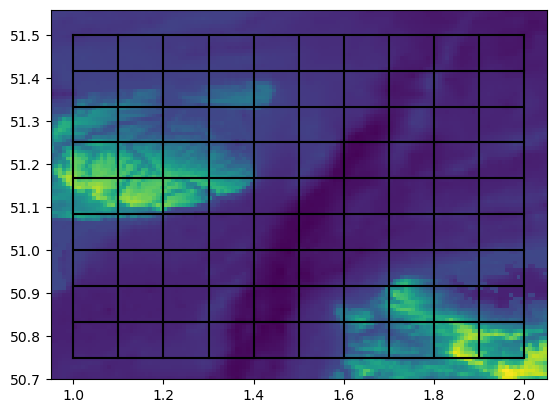

In [4]:
ax = plt.subplot(111)#, projection=cartopy.crs.NearsidePerspective(central_longitude=1.5, central_latitude=51))
topo_subset.plot(ax)
target_mesh.plot(ax)

Flag topography cells that are sampled by mesh nodes

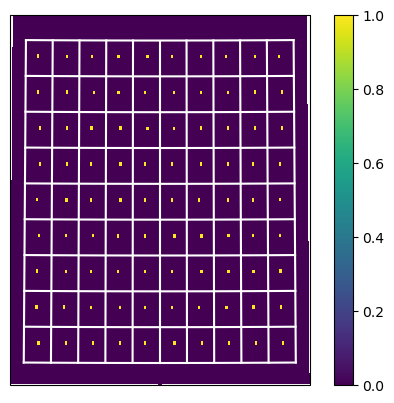

In [5]:
hits = target_mesh.source_hits( topo_subset )

ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=1.5, central_latitude=51))
im = ax.pcolormesh( topo_subset.lonq, topo_subset.latq, hits, transform=cartopy.crs.PlateCarree() )
plt.colorbar(im, ax=ax)
target_mesh.plot(ax, linecolor='w', transform=cartopy.crs.Geodetic())

Refine grid by 2 and re-calculate flagged cells

<GMesh nj:18 ni:20 shape:(18,20)>


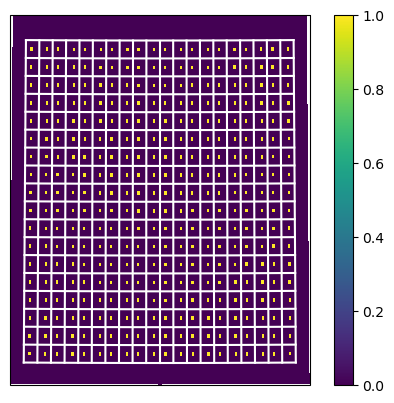

In [6]:
refine_level_1 = target_mesh.refineby2()
print( refine_level_1 )
hits = refine_level_1.source_hits( topo_subset )

ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=1.5, central_latitude=51))
im = ax.pcolormesh( topo_subset.lonq, topo_subset.latq, hits, transform=cartopy.crs.PlateCarree() )
plt.colorbar(im, ax=ax)
refine_level_1.plot(ax, linecolor='w', transform=cartopy.crs.Geodetic())

Further refine by 2 and re-calculate flagged cells

<GMesh nj:36 ni:40 shape:(36,40)>


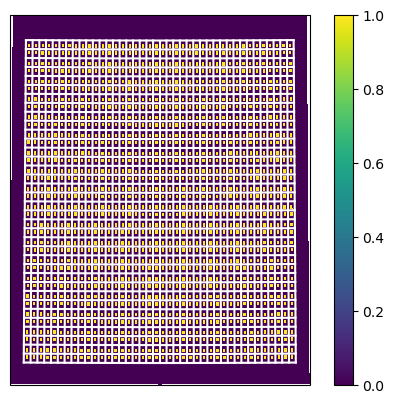

In [7]:
refine_level_2 = refine_level_1.refineby2()
print( refine_level_2 )
hits = refine_level_2.source_hits( topo_subset )

ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=1.5, central_latitude=51))
im = ax.pcolormesh( topo_subset.lonq, topo_subset.latq, hits, transform=cartopy.crs.PlateCarree() )
plt.colorbar(im, ax=ax)
refine_level_2.plot(ax, linecolor='w', transform=cartopy.crs.PlateCarree())

In [8]:
target_mesh.refine_loop( topo_subset );

Refine level 0 <GMesh nj:9 ni:10 shape:(9,10)> Hit 90 out of 13596 cells dx~1/9 dy~1/11 (0.0014 Mb)
Refine level 1 <GMesh nj:18 ni:20 shape:(18,20)> Hit 360 out of 13596 cells dx~1/19 dy~1/23 (0.0055 Mb)
Refine level 2 <GMesh nj:36 ni:40 shape:(36,40)> Hit 1440 out of 13596 cells dx~1/39 dy~1/47 (0.0220 Mb)
Refine level 3 <GMesh nj:72 ni:80 shape:(72,80)> Hit 5760 out of 13596 cells dx~1/79 dy~1/95 (0.0879 Mb)
Refine level 4 <GMesh nj:144 ni:160 shape:(144,160)> Hit 10800 out of 13596 cells dx~1/159 dy~1/191 (0.3516 Mb)


# Test for source grid with converging Meridians and analog of polar cap

In [9]:
# Mesh across North Pole
target_mesh = GMesh.GMesh( lon=np.linspace(-.5, .5, 3), lat=np.linspace(-.5, .5, 3) )
target_mesh.rotate(y_rot=-90)
print( target_mesh.lat.max() )

# Recreate the topography subset
topo_subset = topo_ds.subset( *topo_ds.bb_slices( [-180, 180-1e-9], [89, 90] ) )
print(topo_subset)

90.0
<UniformEDS 43200 x 120 (0.039Gb)
lon = <RegularCoord n=43200, dx=0.008333333333333333, rdx=120.0, x0=-180.0, io=-21600, rem=0.0, is-ie=0-43200, periodic=True>
h:[-179.99583333 -179.9875     -179.97916667 ...  179.97916667  179.9875
  179.99583333]
q:[-180.         -179.99166667 -179.98333333 ...  179.98333333  179.99166667
  180.        ]
lat = <RegularCoord n=21600, dx=0.008333333333333333, rdx=120.0, x0=-90, io=-10800, rem=0.0, is-ie=21480-21600, periodic=False>
h:[89.00416667 89.0125     89.02083333 89.02916667 89.0375     89.04583333
 89.05416667 89.0625     89.07083333 89.07916667 89.0875     89.09583333
 89.10416667 89.1125     89.12083333 89.12916667 89.1375     89.14583333
 89.15416667 89.1625     89.17083333 89.17916667 89.1875     89.19583333
 89.20416667 89.2125     89.22083333 89.22916667 89.2375     89.24583333
 89.25416667 89.2625     89.27083333 89.27916667 89.2875     89.29583333
 89.30416667 89.3125     89.32083333 89.32916667 89.3375     89.34583333
 89.35416667

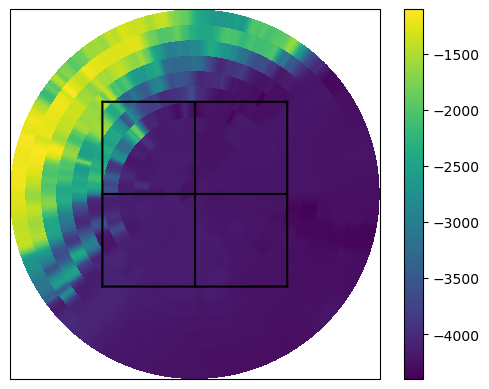

In [10]:
ax = plt.subplot(111, projection=cartopy.crs.NorthPolarStereo())
# topomesh = GMesh.GMesh(lon=topo_lon[::10], lat=topo_lat[::10], from_cell_center=True)
# im = topomesh.pcolormesh(ax, topo_elv[::10,::10], transform=cartopy.crs.PlateCarree())
im = topo_subset.plot(ax, subsample=10, transform=cartopy.crs.PlateCarree() )
plt.colorbar(im,ax=ax)

target_mesh.plot(ax, transform=cartopy.crs.Geodetic())

In [11]:
R = target_mesh.refine_loop( topo_subset, resolution_limit=False, fixed_refine_level=6 )

Refine level 0 <GMesh nj:2 ni:2 shape:(2,2)> (0.0001 Mb)
Refine level 1 <GMesh nj:4 ni:4 shape:(4,4)> (0.0002 Mb)
Refine level 2 <GMesh nj:8 ni:8 shape:(8,8)> (0.0010 Mb)
Refine level 3 <GMesh nj:16 ni:16 shape:(16,16)> (0.0039 Mb)
Refine level 4 <GMesh nj:32 ni:32 shape:(32,32)> (0.0156 Mb)
Refine level 5 <GMesh nj:64 ni:64 shape:(64,64)> (0.0625 Mb)
Refine level 6 <GMesh nj:128 ni:128 shape:(128,128)> (0.2500 Mb)


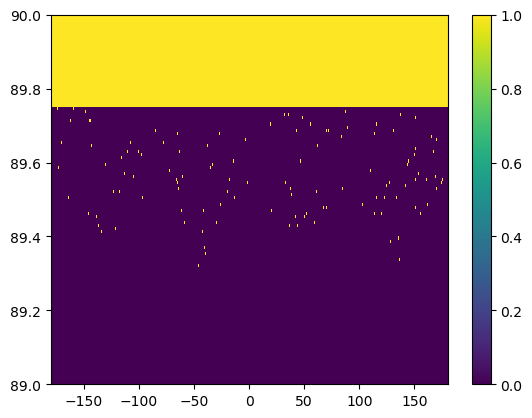

In [12]:
ax = plt.subplot(111)#, projection=cartopy.crs.NorthPolarStereo())
hits = R[6].source_hits( topo_subset )
im = ax.pcolormesh( topo_subset.lonq, topo_subset.latq, hits )
plt.colorbar(im,ax=ax);